### aim: check that all data 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

import arrow

## MERRA2

In [4]:
tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NASA-MERRA2/raw/downloads/'

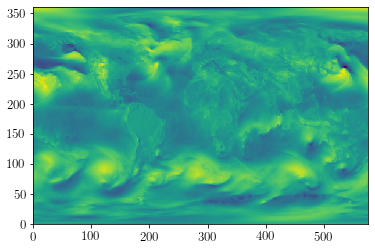

In [5]:
tf = 'MERRA2_100.tavg1_2d_slv_Nx.19800110.nc4'

w =xr.open_dataset(f'{tdir}{tf}')
w
plt.pcolormesh(w['U10M'][23,:,:])

In [6]:
def get_daily(yr):

    date_list = []
    
    # Loop through all months and days of the year
    for month in range(1, 13):  # Months from 1 to 12
        for day in range(1, 32):  # Days from 1 to 31
            try:
                # Create a date with year, month, and day
                date = arrow.get(yr, month, day)
                # Format the date as YYYYMMDD
                formatted_date = date.format('YYYYMMDD')
                # Append to the list
                date_list.append(formatted_date)
            except:
                #print(f'no {month} {day}')
                # Skip invalid dates (e.g., 1980-02-30)
                continue
    
    print(len(date_list))
    print(date_list[364])

    for i in range(0,len(date_list)):
        td = date_list[i]
        # print(td)
        tl = glob.glob(f'/gpfs/data/greenocean2/software/products/windsFromComponents/NASA-MERRA2/raw/downloads/*{td}*nc*')
        print(tl)
        
        tdat = (tl[0])
        w = xr.open_dataset(tdat)
        
        # Resample both variables from hourly to daily, taking the mean for simplicity
        UL_daily = w['U10M'].resample(time='1D').mean()
        VL_daily = w['V10M'].resample(time='1D').mean()
        twind = xr.ufuncs.sqrt(xr.ufuncs.square(UL_daily) + xr.ufuncs.square(VL_daily))
        twind.name = 'windspeed'

        # Create a new dataset with the resampled variables
        new_ds = xr.Dataset({
            'u10m': UL_daily,
            'v10m': VL_daily,
            'wspd10m': twind,
        
            
        })
        
        newdat = f'/gpfs/data/greenocean2/software/products/windsFromComponents/NASA-MERRA2/daily/MERRA2_{td}_daily.nc'
        # if i%20 == 0:
        #     print(newdat)
        new_ds.to_netcdf(newdat)        
        

## test daily

In [7]:
def test_daily(yr):

    date_list = []
    
    # Loop through all months and days of the year
    for month in range(1, 13):  # Months from 1 to 12
        for day in range(1, 32):  # Days from 1 to 31
            try:
                # Create a date with year, month, and day
                date = arrow.get(yr, month, day)
                # Format the date as YYYYMMDD
                formatted_date = date.format('YYYYMMDD')
                # Append to the list
                date_list.append(formatted_date)
            except:
                #print(f'no {month} {day}')
                # Skip invalid dates (e.g., 1980-02-30)
                continue
    
    print(len(date_list))
    print(date_list[364])

    for i in range(0,len(date_list)):
        td = date_list[i]
        # print(td)
        tl = glob.glob(f'/gpfs/data/greenocean2/software/products/windsFromComponents/NASA-MERRA2/raw/downloads/*{td}*nc*')
        #print(tl)
        try:
            tdat = (tl[0])
            w = xr.open_dataset(tdat)
        except:
            print(td)
    
        

In [8]:
ex = False
if ex:
    # for yr in range(1981,2024):
    #     print(yr)
    #     test_daily(yr)
    for yr in range(1984,2024):
        print(yr)
        get_daily(yr)

In [9]:
# ex = True
# if ex:
#     for yr in range(1981,2024):
#         print(yr)
#         get_daily(yr)
#     # for yr in range(1995,2024):
#     #     print(yr)
#     #     get_daily(yr)

In [10]:
def get_daily_list(yr):

    date_list = []
    
    # Loop through all months and days of the year
    for month in range(1, 13):  # Months from 1 to 12
        for day in range(1, 32):  # Days from 1 to 31
            try:
                # Create a date with year, month, and day
                date = arrow.get(yr, month, day)
                # Format the date as YYYYMMDD
                formatted_date = date.format('YYYYMMDD')
                # Append to the list
                date_list.append(formatted_date)
            except:
                #print(f'no {month} {day}')
                # Skip invalid dates (e.g., 1980-02-30)
                continue
    
    print(len(date_list))
    print(date_list[364])

    dailylist = []
    for i in range(0,len(date_list)):
        td = date_list[i]
        tl = glob.glob(f'/gpfs/data/greenocean2/software/products/windsFromComponents/NASA-MERRA2/daily/MERRA2_{td}_daily.nc')
        tdat = (tl[0])
        dailylist.append(tdat)

    return dailylist


In [11]:
ex = False
if ex:
    for y in range(1997,2024):

        dl = get_daily_list(y)
        w = xr.open_mfdataset(dl)
        w.to_netcdf(f'/gpfs/data/greenocean2/software/products/windsFromComponents/NASA-MERRA2/daily/MERRA2_FY_{y}_daily.nc')

In [12]:
td = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/MERRA/'


ex = False
if ex:
    for y in range(1991,2024):

        w = xr.open_mfdataset(f'{td}/MERRA_wind_daily_1x1_{y}.nc')
        wr = w.rename({"time": "time_counter"})
        wr.to_netcdf(f'{td}/fix/MERRA_wind_daily_1x1_{y}.nc')